## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
df = pd.read_csv('/home/kipkorir/meta_2014_2023.csv')
df.head(10)

date       open       high        low      close    volume  \
0  2014-01-02  54.830002  55.220001  54.189999  54.709999  43195500   
1  2014-01-03  55.020000  55.650002  54.529999  54.560001  38246200   
2  2014-01-06  54.419998  57.259998  54.049999  57.200001  68852600   
3  2014-01-07  57.700001  58.549999  57.220001  57.919998  77207400   
4  2014-01-08  57.599998  58.410000  57.230000  58.230000  56682400   
5  2014-01-09  58.650002  58.959999  56.650002  57.220001  92253300   
6  2014-01-10  57.130001  58.299999  57.060001  57.939999  42449500   
7  2014-01-13  57.910000  58.250000  55.380001  55.910000  63010900   
8  2014-01-14  56.459999  57.779999  56.099998  57.740002  37503600   
9  2014-01-15  57.980000  58.570000  57.270000  57.599998  33663400   

       rsi_7     rsi_14       cci_7      cci_14   sma_50     ema_50  sma_100  \
0  51.917475  58.077822  -64.312117  -13.517101  50.2818  50.740946  47.6654   
1  50.604988  57.387622  -40.054734  -17.361246  50.3194  50.890719  47.8288   
2  67.483917  65.221525   43.907749   42.364730  50.4254  51.138151  48.0306   
3  70.672584  67.003189  150.620136  117.886980  50.5348  51.404115  48.2433   
4  72.049420  67.768804  107.795942  101.415192  50.6604  51.671806  48.4600   
5  61.139242  62.667059   67.348891   72.506466  50.8002  51.889389  48.6614   
6  65.485896  64.706800   56.148766   68.897572  50.9710  52.126676  48.8627   
7  47.872555  55.499705  -32.374938    0.494863  51.1090  52.275046  49.0377   
8  59.366740  60.900791  -11.118995   38.260302  51.2596  52.489364  49.2319   
9  58.220894  60.297824   47.470053   71.421641  51.4166  52.689787  49.4224   

     ema_100      macd  bollinger  TrueRange     atr_7    atr_14  \
0  46.914555  1.828901    53.2450   1.030002  1.652052  1.710739   
1  47.066897  1.687987    53.5420   1.120003  1.576045  1.668543   
2  47.268784  1.768947    53.9850   3.209999  1.809467  1.778647   
3  47.480966  1.869653    54.4840   1.349998  1.743829  1.748030   
4  47.695073  1.951977    54.9535   1.180000  1.663282  1.707456   
5  47.884774  1.913662    55.3020   2.309997  1.755670  1.750495   
6  48.085014  1.919270    55.7300   1.239998  1.682002  1.714031   
7  48.240824  1.739855    55.9340   2.869999  1.851716  1.796600   
8  48.429949  1.725443    56.1550   1.869999  1.854328  1.801843   
9  48.612501  1.683320    56.3445   1.300000  1.775138  1.765997   

   next_day_close  
0       54.560001  
1       57.200001  
2       57.919998  
3       58.230000  
4       57.220001  
5       57.939999  
6       55.910000  
7       57.740002  
8       57.599998  
9       57.189999

## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            2516 non-null   object 
 1   open            2516 non-null   float64
 2   high            2516 non-null   float64
 3   low             2516 non-null   float64
 4   close           2516 non-null   float64
 5   volume          2516 non-null   int64  
 6   rsi_7           2516 non-null   float64
 7   rsi_14          2516 non-null   float64
 8   cci_7           2516 non-null   float64
 9   cci_14          2516 non-null   float64
 10  sma_50          2516 non-null   float64
 11  ema_50          2516 non-null   float64
 12  sma_100         2516 non-null   float64
 13  ema_100         2516 non-null   float64
 14  macd            2516 non-null   float64
 15  bollinger       2516 non-null   float64
 16  TrueRange       2516 non-null   float64
 17  atr_7           2516 non-null   f

In [4]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Verify the conversion
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2516 non-null   datetime64[ns]
 1   open            2516 non-null   float64       
 2   high            2516 non-null   float64       
 3   low             2516 non-null   float64       
 4   close           2516 non-null   float64       
 5   volume          2516 non-null   int64         
 6   rsi_7           2516 non-null   float64       
 7   rsi_14          2516 non-null   float64       
 8   cci_7           2516 non-null   float64       
 9   cci_14          2516 non-null   float64       
 10  sma_50          2516 non-null   float64       
 11  ema_50          2516 non-null   float64       
 12  sma_100         2516 non-null   float64       
 13  ema_100         2516 non-null   float64       
 14  macd            2516 non-null   float64       
 15  boll

In [5]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'rsi_7', 'rsi_14',
       'cci_7', 'cci_14', 'sma_50', 'ema_50', 'sma_100', 'ema_100', 'macd',
       'bollinger', 'TrueRange', 'atr_7', 'atr_14', 'next_day_close'],
      dtype='object')

In [6]:
df.shape

(2516, 20)

In [7]:
# Check for missing numbers
df.isnull().sum()

date              0
open              0
high              0
low               0
close             0
volume            0
rsi_7             0
rsi_14            0
cci_7             0
cci_14            0
sma_50            0
ema_50            0
sma_100           0
ema_100           0
macd              0
bollinger         0
TrueRange         0
atr_7             0
atr_14            0
next_day_close    0
dtype: int64

In [8]:
# Checking for duplicates
df.duplicated().sum()

0

## Statistical Summary

In [9]:
df.describe()

date         open         high          low  \
count                           2516  2516.000000  2516.000000  2516.000000   
mean   2018-12-31 00:18:53.227344896   178.035517   180.328621   175.826359   
min              2014-01-02 00:00:00    54.020000    54.939999    51.849998   
25%              2016-06-30 18:00:00   115.787498   117.452497   114.007502   
50%              2019-01-01 00:00:00   170.114998   172.110001   168.224998   
75%              2021-06-30 06:00:00   220.297504   221.827499   216.492501   
max              2023-12-29 00:00:00   381.679993   384.329987   378.809998   
std                              NaN    81.123720    82.200952    80.118216   

             close        volume        rsi_7       rsi_14        cci_7  \
count  2516.000000  2.516000e+03  2516.000000  2516.000000  2516.000000   
mean    178.129122  2.617010e+07    54.339039    54.047585    13.860957   
min      53.529999  5.467500e+06    14.083263    21.934202  -233.333333   
25%     115.565003  1.563175e+07    43.513651    46.359166   -68.969530   
50%     170.245002  2.106275e+07    55.357801    54.679774    27.716116   
75%     219.864994  3.022008e+07    66.148583    62.652629    95.153139   
max     382.179993  2.323166e+08    93.579562    86.065371   233.333333   
std      81.166653  1.782460e+07    15.808831    11.486580    99.506607   

            cci_14       sma_50       ema_50      sma_100      ema_100  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean     21.786028   175.350939   175.391728   172.714407   172.828966   
min    -422.479783    50.281800    50.740946    47.665400    46.914555   
25%     -57.372272   115.554749   115.484737   112.843875   112.552245   
50%      35.250491   170.474200   170.871460   170.365500   171.015576   
75%     102.728473   210.956750   216.288210   203.539550   214.056316   
max     418.499830   363.754401   362.957061   351.029901   347.213736   
std     107.431270    79.621484    79.101923    78.246631    77.120070   

              macd    bollinger    TrueRange        atr_7       atr_14  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean      0.787792   177.025524     5.009948     4.998040     4.981088   
min     -29.046311    53.245000     0.529999     1.095919     1.276304   
25%      -0.881898   114.901500     2.087497     2.292068     2.379389   
50%       1.032127   169.461749     3.904995     4.305433     4.363978   
75%       2.855147   216.494625     6.619995     7.373164     7.530707   
max      15.623524   373.422003    87.250000    22.274682    16.665167   
std       4.869274    80.479297     4.338035     3.045084     2.912425   

       next_day_close  
count     2516.000000  
mean       178.245012  
min         53.529999  
25%        115.792499  
50%        170.264999  
75%        220.222496  
max        382.179993  
std         81.198518

In [10]:
df.describe().style.background_gradient(cmap = 'plasma')

## Exploratory Data Analysis (EDA)

### Distribution Analysis

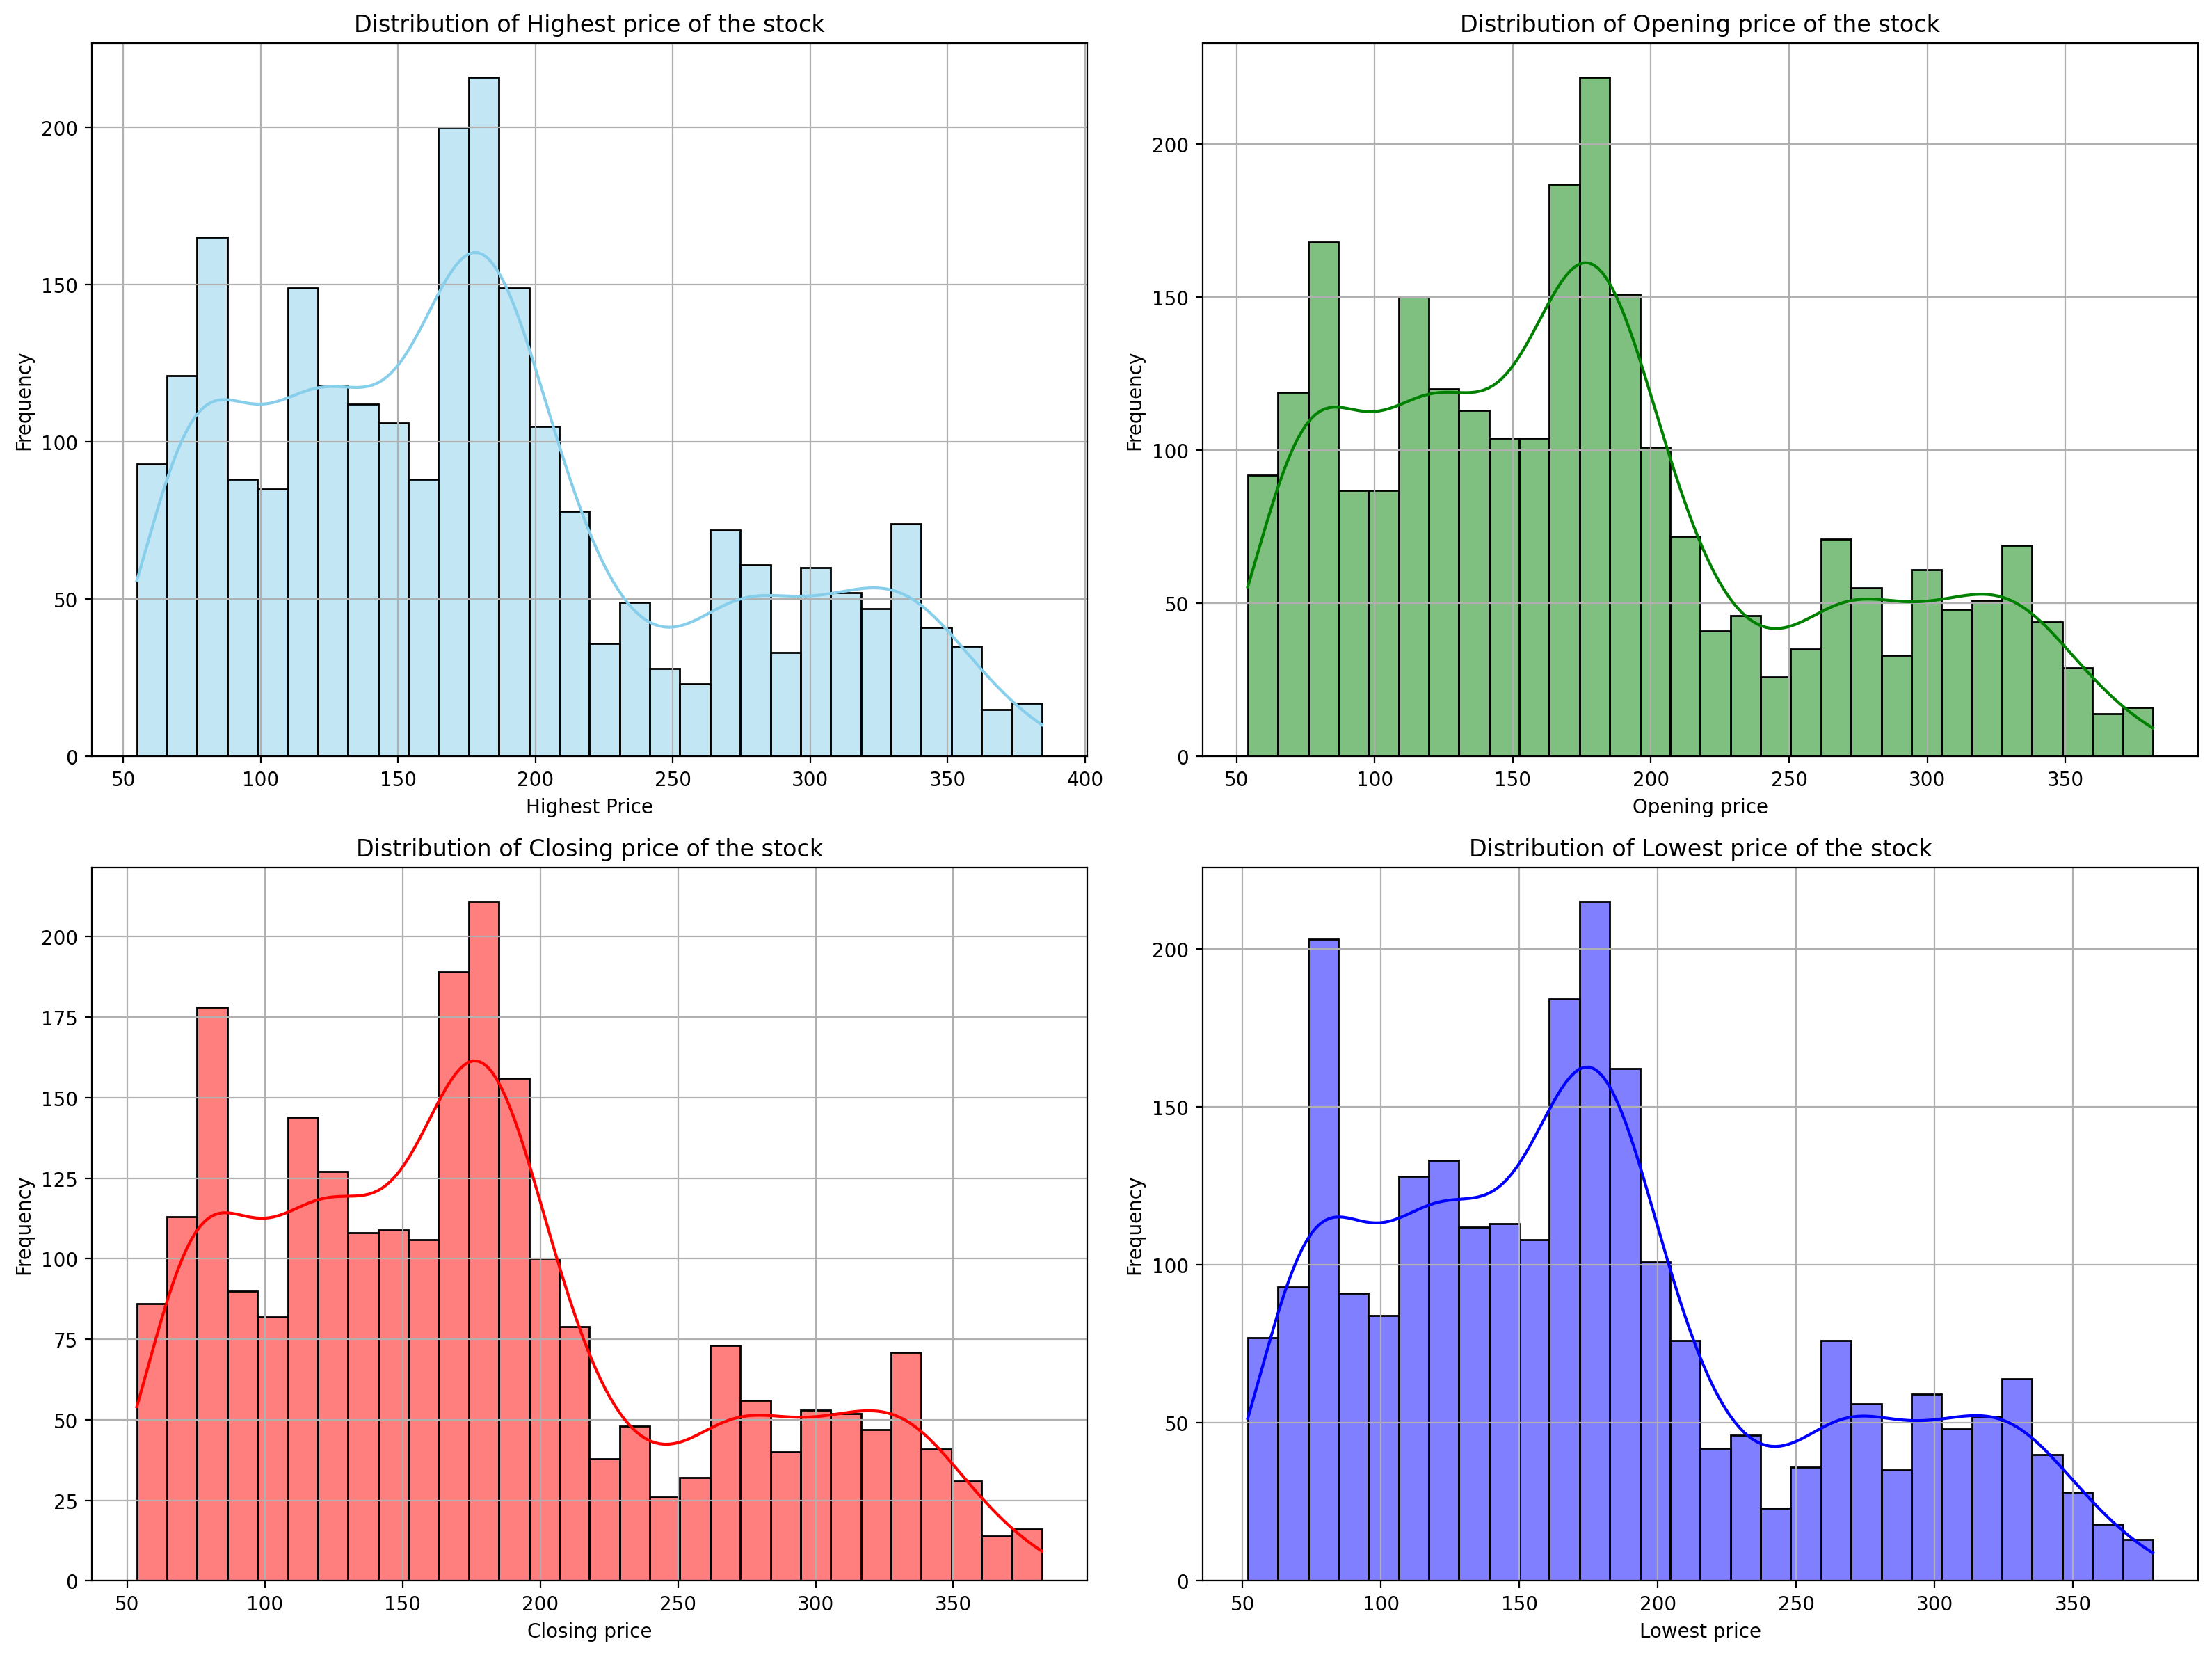

In [11]:
fig, ax = plt.subplots(2, 2, figsize = (16, 12), dpi = 200)
# Histogram of Highest Price
sns.histplot(df['high'], bins=30, kde=True, color='skyblue', edgecolor='black', ax = ax[0, 0])
ax[0, 0].set_title('Distribution of Highest price of the stock')
ax[0, 0].set_xlabel("Highest Price")
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].grid(True)

# Histogram of Opening Price
sns.histplot(df['open'], bins=30, kde=True, color='green', edgecolor='black', ax = ax[0, 1])
ax[0, 1].set_title('Distribution of Opening price of the stock')
ax[0, 1].set_xlabel("Opening price")
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].grid(True)

# Histogram of Closing Price
sns.histplot(df['close'], bins=30, kde=True, color='red', edgecolor='black', ax = ax[1, 0])
ax[1, 0].set_title('Distribution of Closing price of the stock')
ax[1, 0].set_xlabel("Closing price")
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].grid(True)

# Histogram of Opening Price
sns.histplot(df['low'], bins=30, kde=True, color= 'blue', edgecolor='black', ax = ax[1, 1])
ax[1, 1].set_title('Distribution of Lowest price of the stock')
ax[1, 1].set_xlabel("Lowest price")
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()

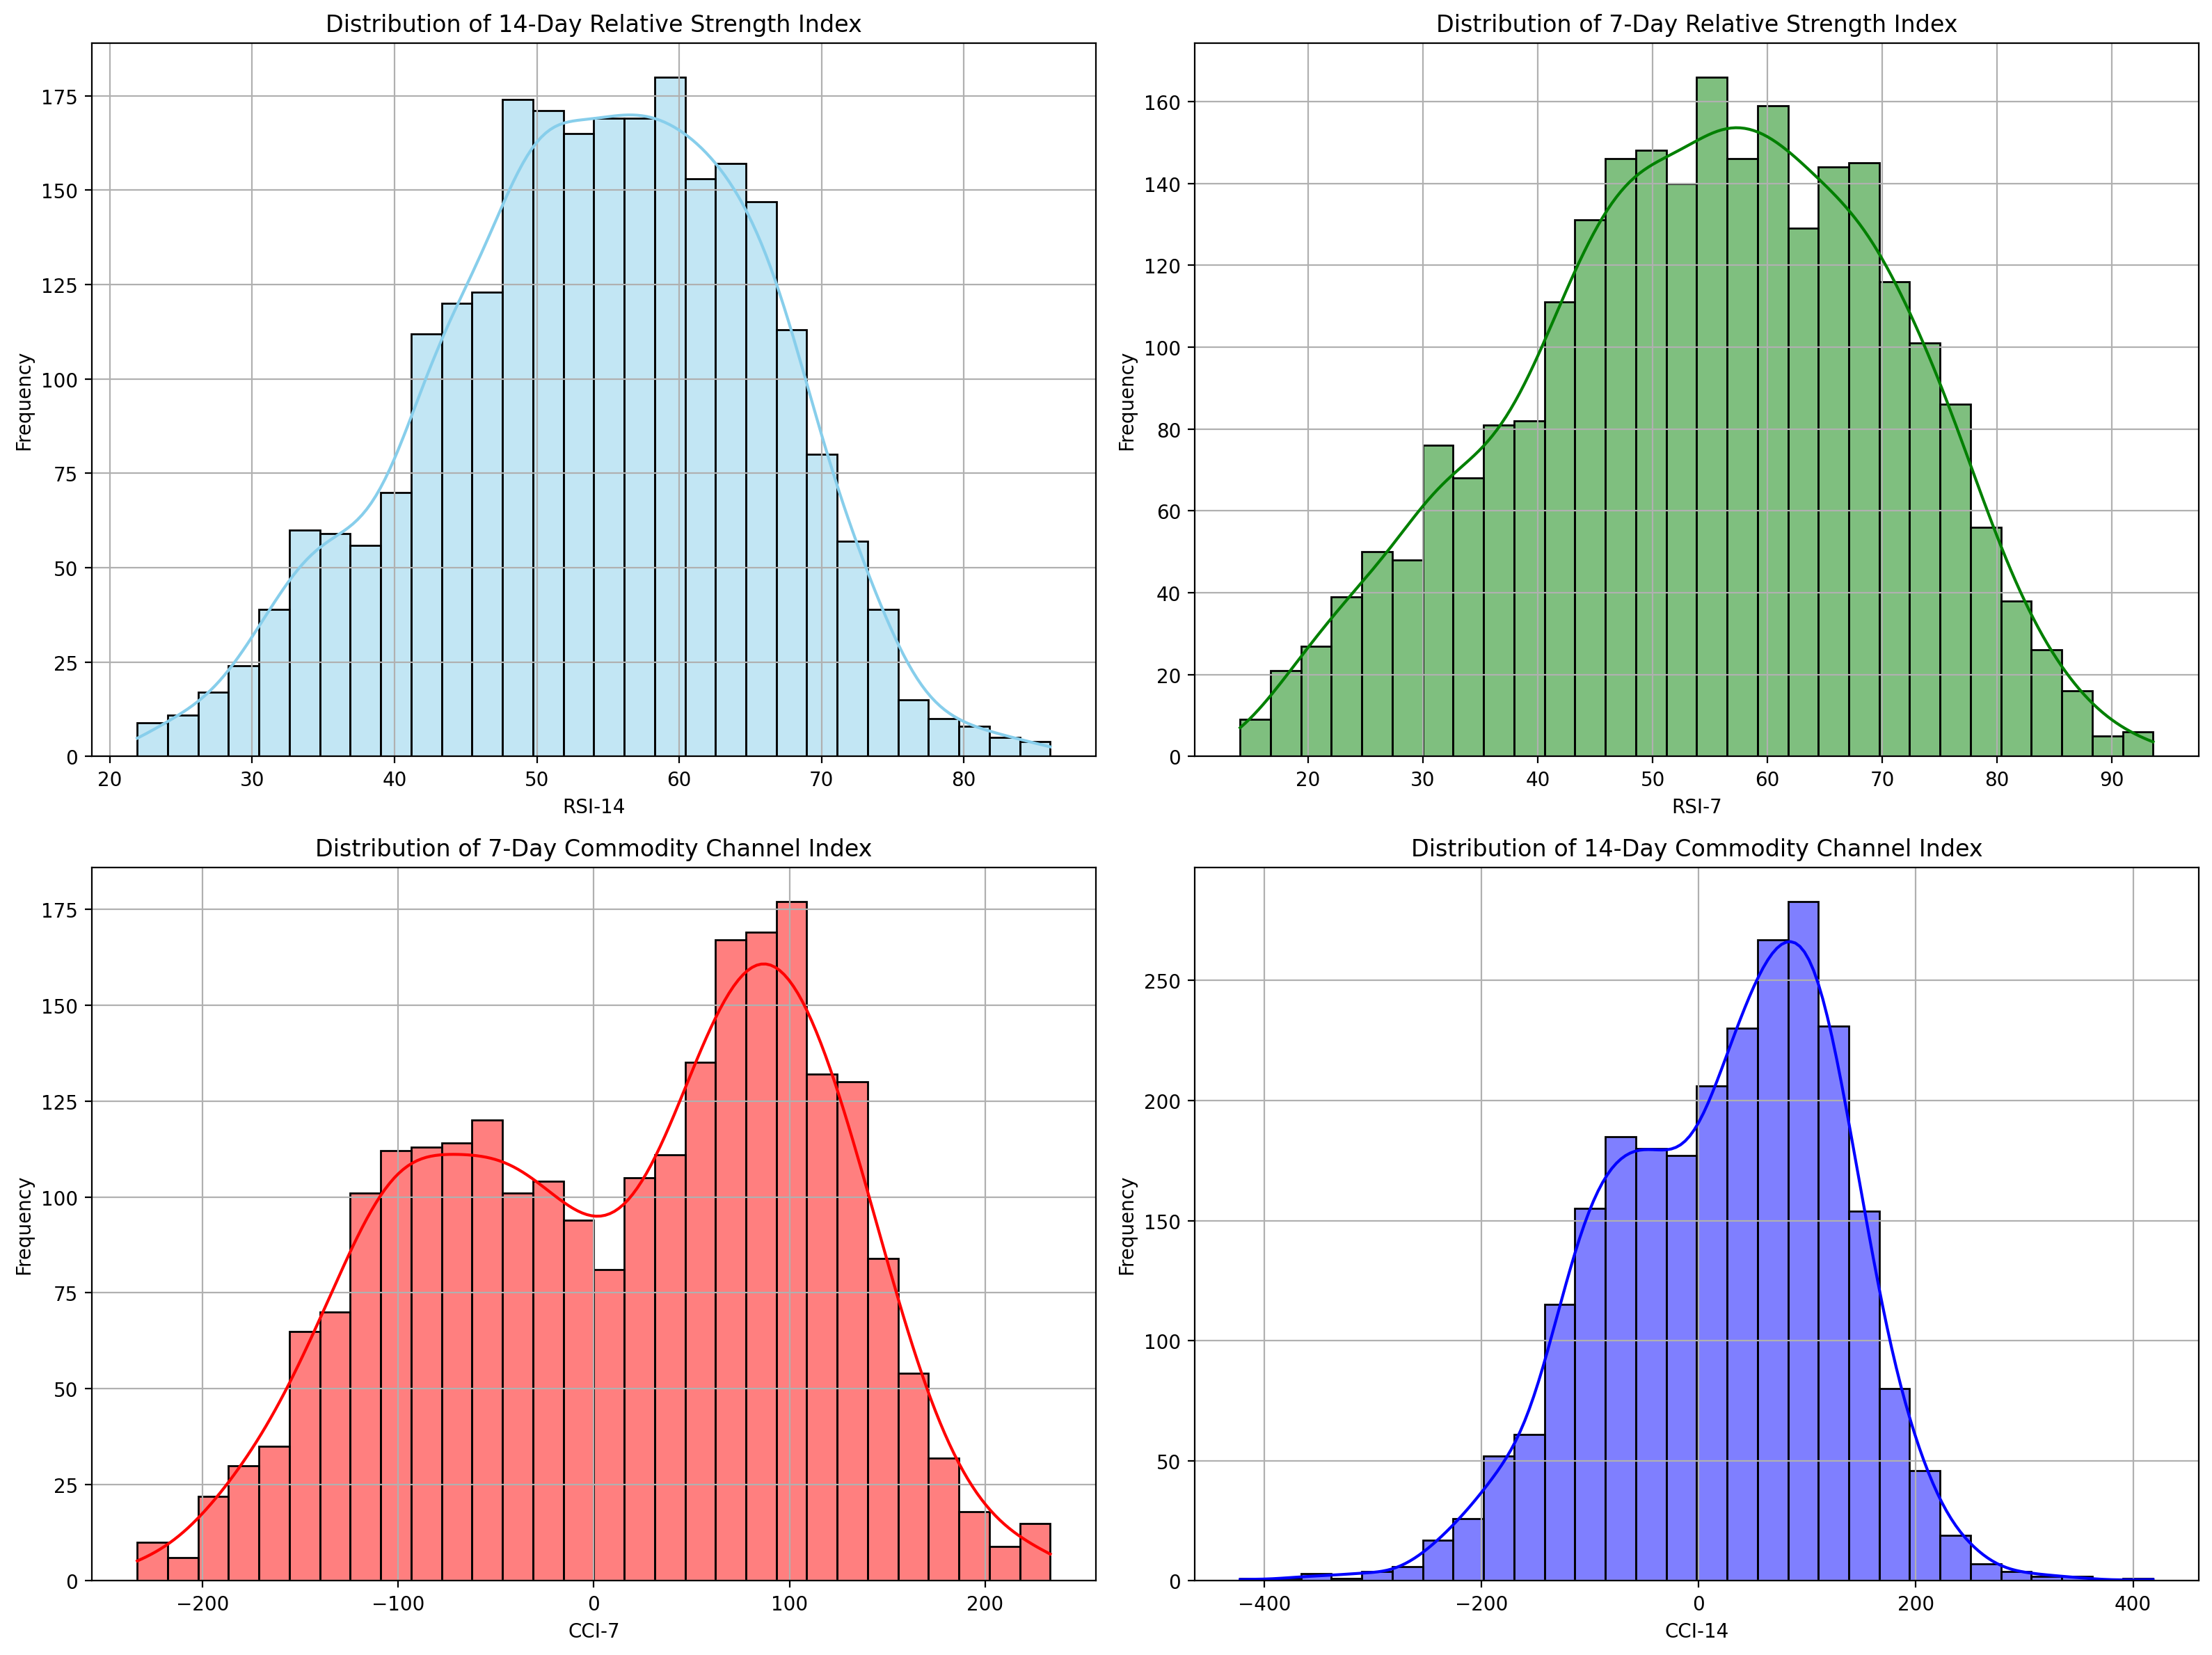

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (16, 12), dpi = 200)
# Histogram of 14-Day Relative Strength Index
sns.histplot(df['rsi_14'], bins=30, kde=True, color='skyblue', edgecolor='black', ax = ax[0, 0])
ax[0, 0].set_title('Distribution of 14-Day Relative Strength Index')
ax[0, 0].set_xlabel("RSI-14")
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].grid(True)

# Histogram of 7-Day Relative Strength Index
sns.histplot(df['rsi_7'], bins=30, kde=True, color='green', edgecolor='black', ax = ax[0, 1])
ax[0, 1].set_title('Distribution of 7-Day Relative Strength Index')
ax[0, 1].set_xlabel("RSI-7")
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].grid(True)

# Histogram of 7-Day Commodity Channel Index
sns.histplot(df['cci_7'], bins=30, kde=True, color='red', edgecolor='black', ax = ax[1, 0])
ax[1, 0].set_title('Distribution of 7-Day Commodity Channel Index')
ax[1, 0].set_xlabel("CCI-7")
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].grid(True)

# Histogram of 14-Day Commodity Channel Index
sns.histplot(df['cci_14'], bins=30, kde=True, color= 'blue', edgecolor='black', ax = ax[1, 1])
ax[1, 1].set_title('Distribution of 14-Day Commodity Channel Index')
ax[1, 1].set_xlabel("CCI-14")
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()

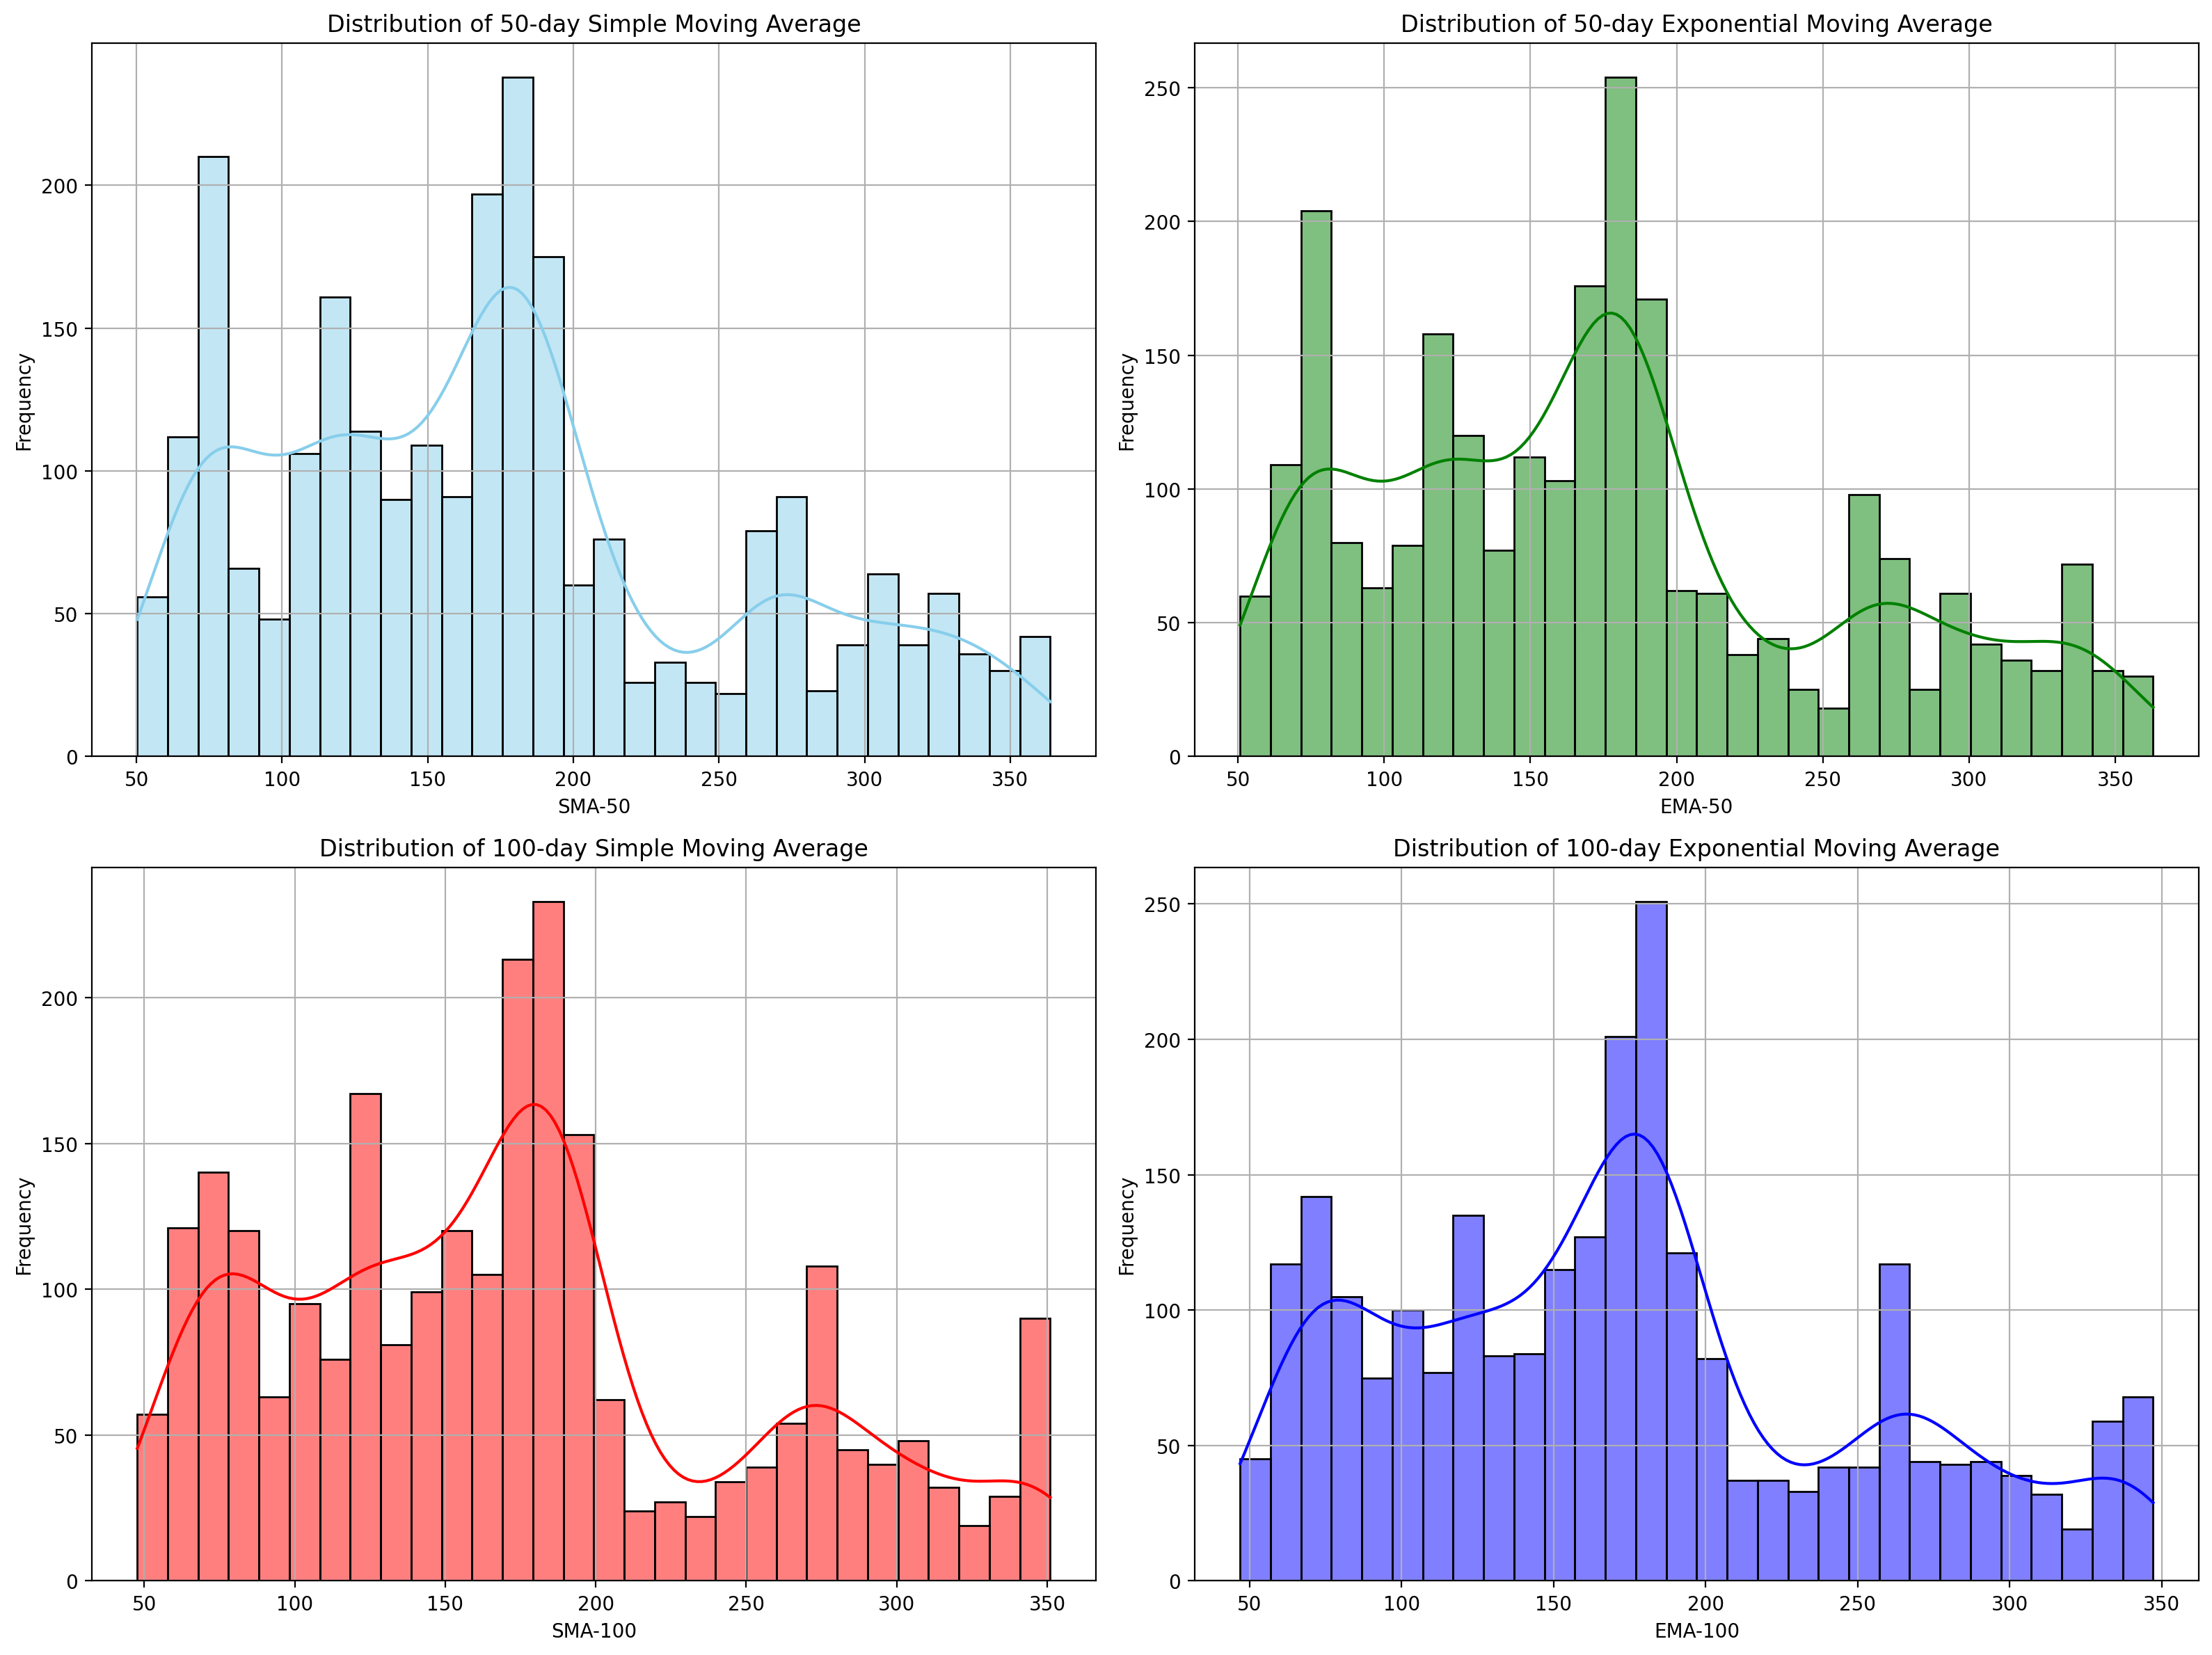

In [13]:
fig, ax = plt.subplots(2, 2, figsize = (16, 12), dpi = 200)
# Histogram of 50-day Simple Moving Average
sns.histplot(df['sma_50'], bins=30, kde=True, color='skyblue', edgecolor='black', ax = ax[0, 0])
ax[0, 0].set_title('Distribution of 50-day Simple Moving Average')
ax[0, 0].set_xlabel("SMA-50")
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].grid(True)

# Histogram of 50-day Exponential Moving Average
sns.histplot(df['ema_50'], bins=30, kde=True, color='green', edgecolor='black', ax = ax[0, 1])
ax[0, 1].set_title('Distribution of 50-day Exponential Moving Average')
ax[0, 1].set_xlabel("EMA-50")
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].grid(True)

# Histogram of 100-day Simple Moving Average
sns.histplot(df['sma_100'], bins=30, kde=True, color='red', edgecolor='black', ax = ax[1, 0])
ax[1, 0].set_title('Distribution of 100-day Simple Moving Average')
ax[1, 0].set_xlabel("SMA-100")
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].grid(True)

# Histogram of 100-day Exponential Moving Average
sns.histplot(df['ema_100'], bins=30, kde=True, color= 'blue', edgecolor='black', ax = ax[1, 1])
ax[1, 1].set_title('Distribution of 100-day Exponential Moving Average')
ax[1, 1].set_xlabel("EMA-100")
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()

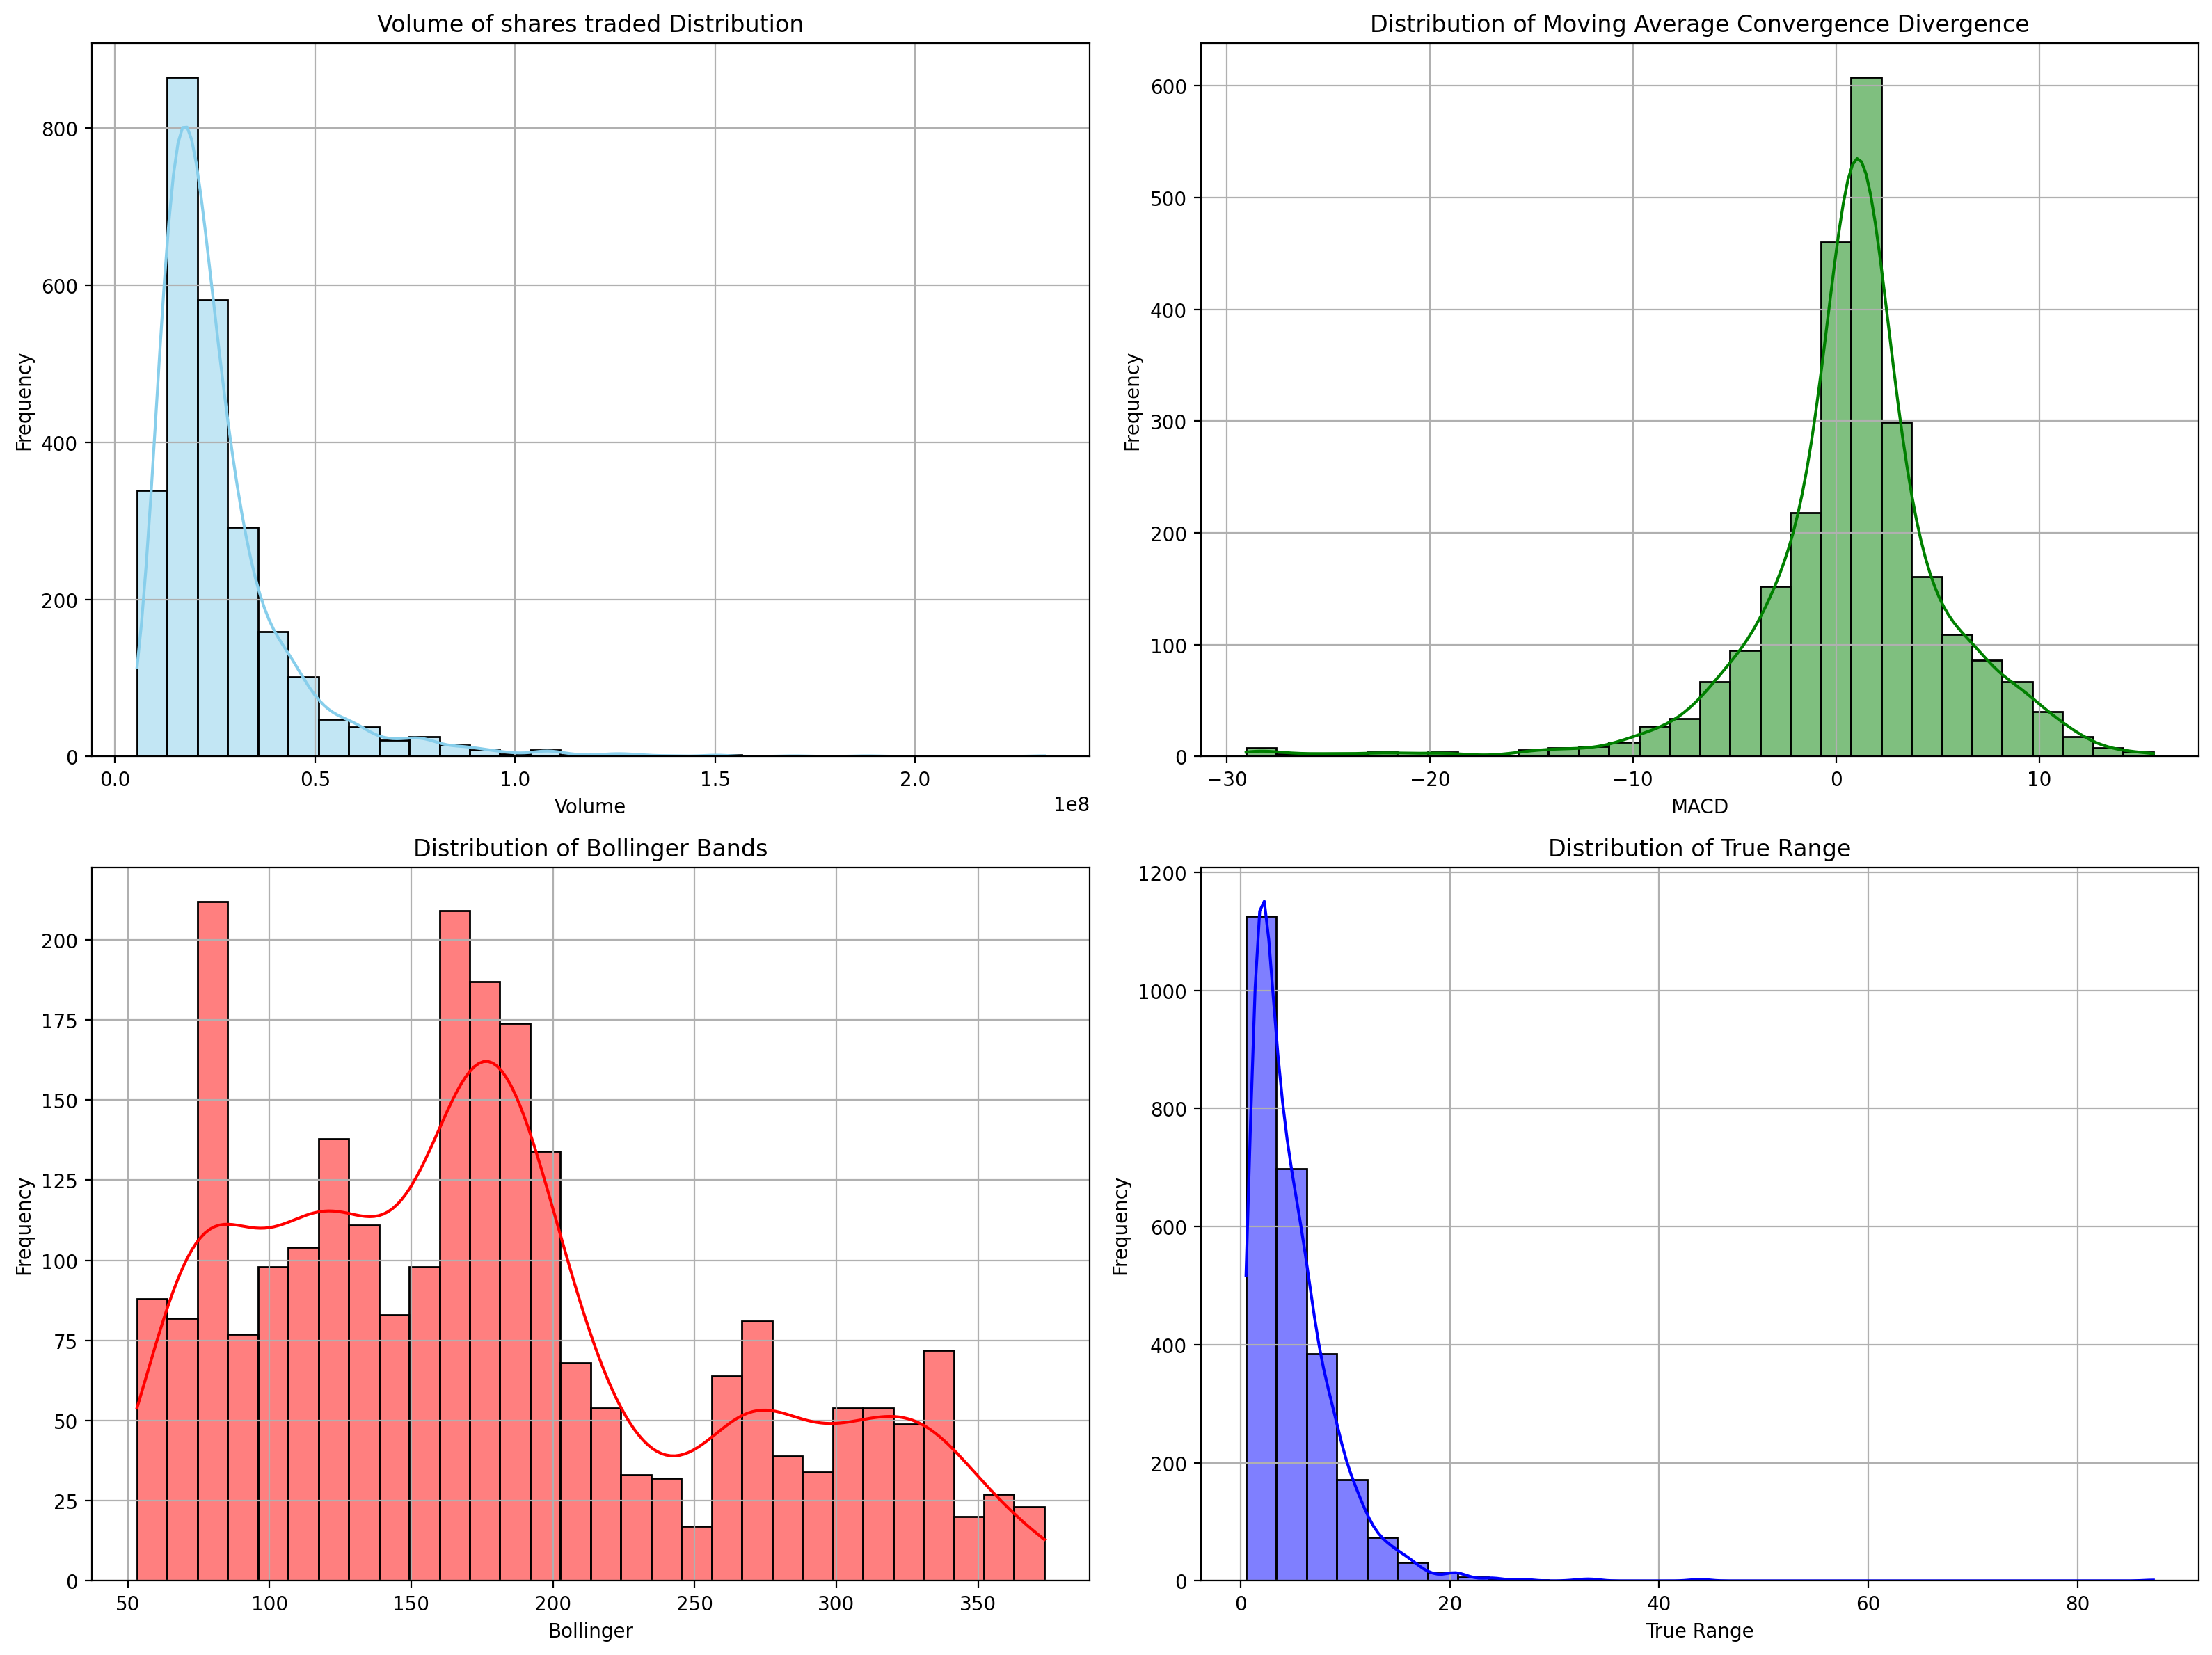

In [14]:
fig, ax = plt.subplots(2, 2, figsize = (16, 12), dpi = 200)
# Histogram of Volume of shares traded
sns.histplot(df['volume'], bins=30, kde=True, color='skyblue', edgecolor='black', ax = ax[0, 0])
ax[0, 0].set_title('Volume of shares traded Distribution')
ax[0, 0].set_xlabel("Volume")
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].grid(True)

# Histogram of Moving Average Convergence Divergence
sns.histplot(df['macd'], bins=30, kde=True, color='green', edgecolor='black', ax = ax[0, 1])
ax[0, 1].set_title('Distribution of Moving Average Convergence Divergence')
ax[0, 1].set_xlabel("MACD")
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].grid(True)

# Histogram of Bollinger Bands
sns.histplot(df['bollinger'], bins=30, kde=True, color='red', edgecolor='black', ax = ax[1, 0])
ax[1, 0].set_title('Distribution of Bollinger Bands')
ax[1, 0].set_xlabel("Bollinger")
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].grid(True)

# Histogram of True Range
sns.histplot(df['TrueRange'], bins=30, kde=True, color= 'blue', edgecolor='black', ax = ax[1, 1])
ax[1, 1].set_title('Distribution of True Range')
ax[1, 1].set_xlabel("True Range")
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()

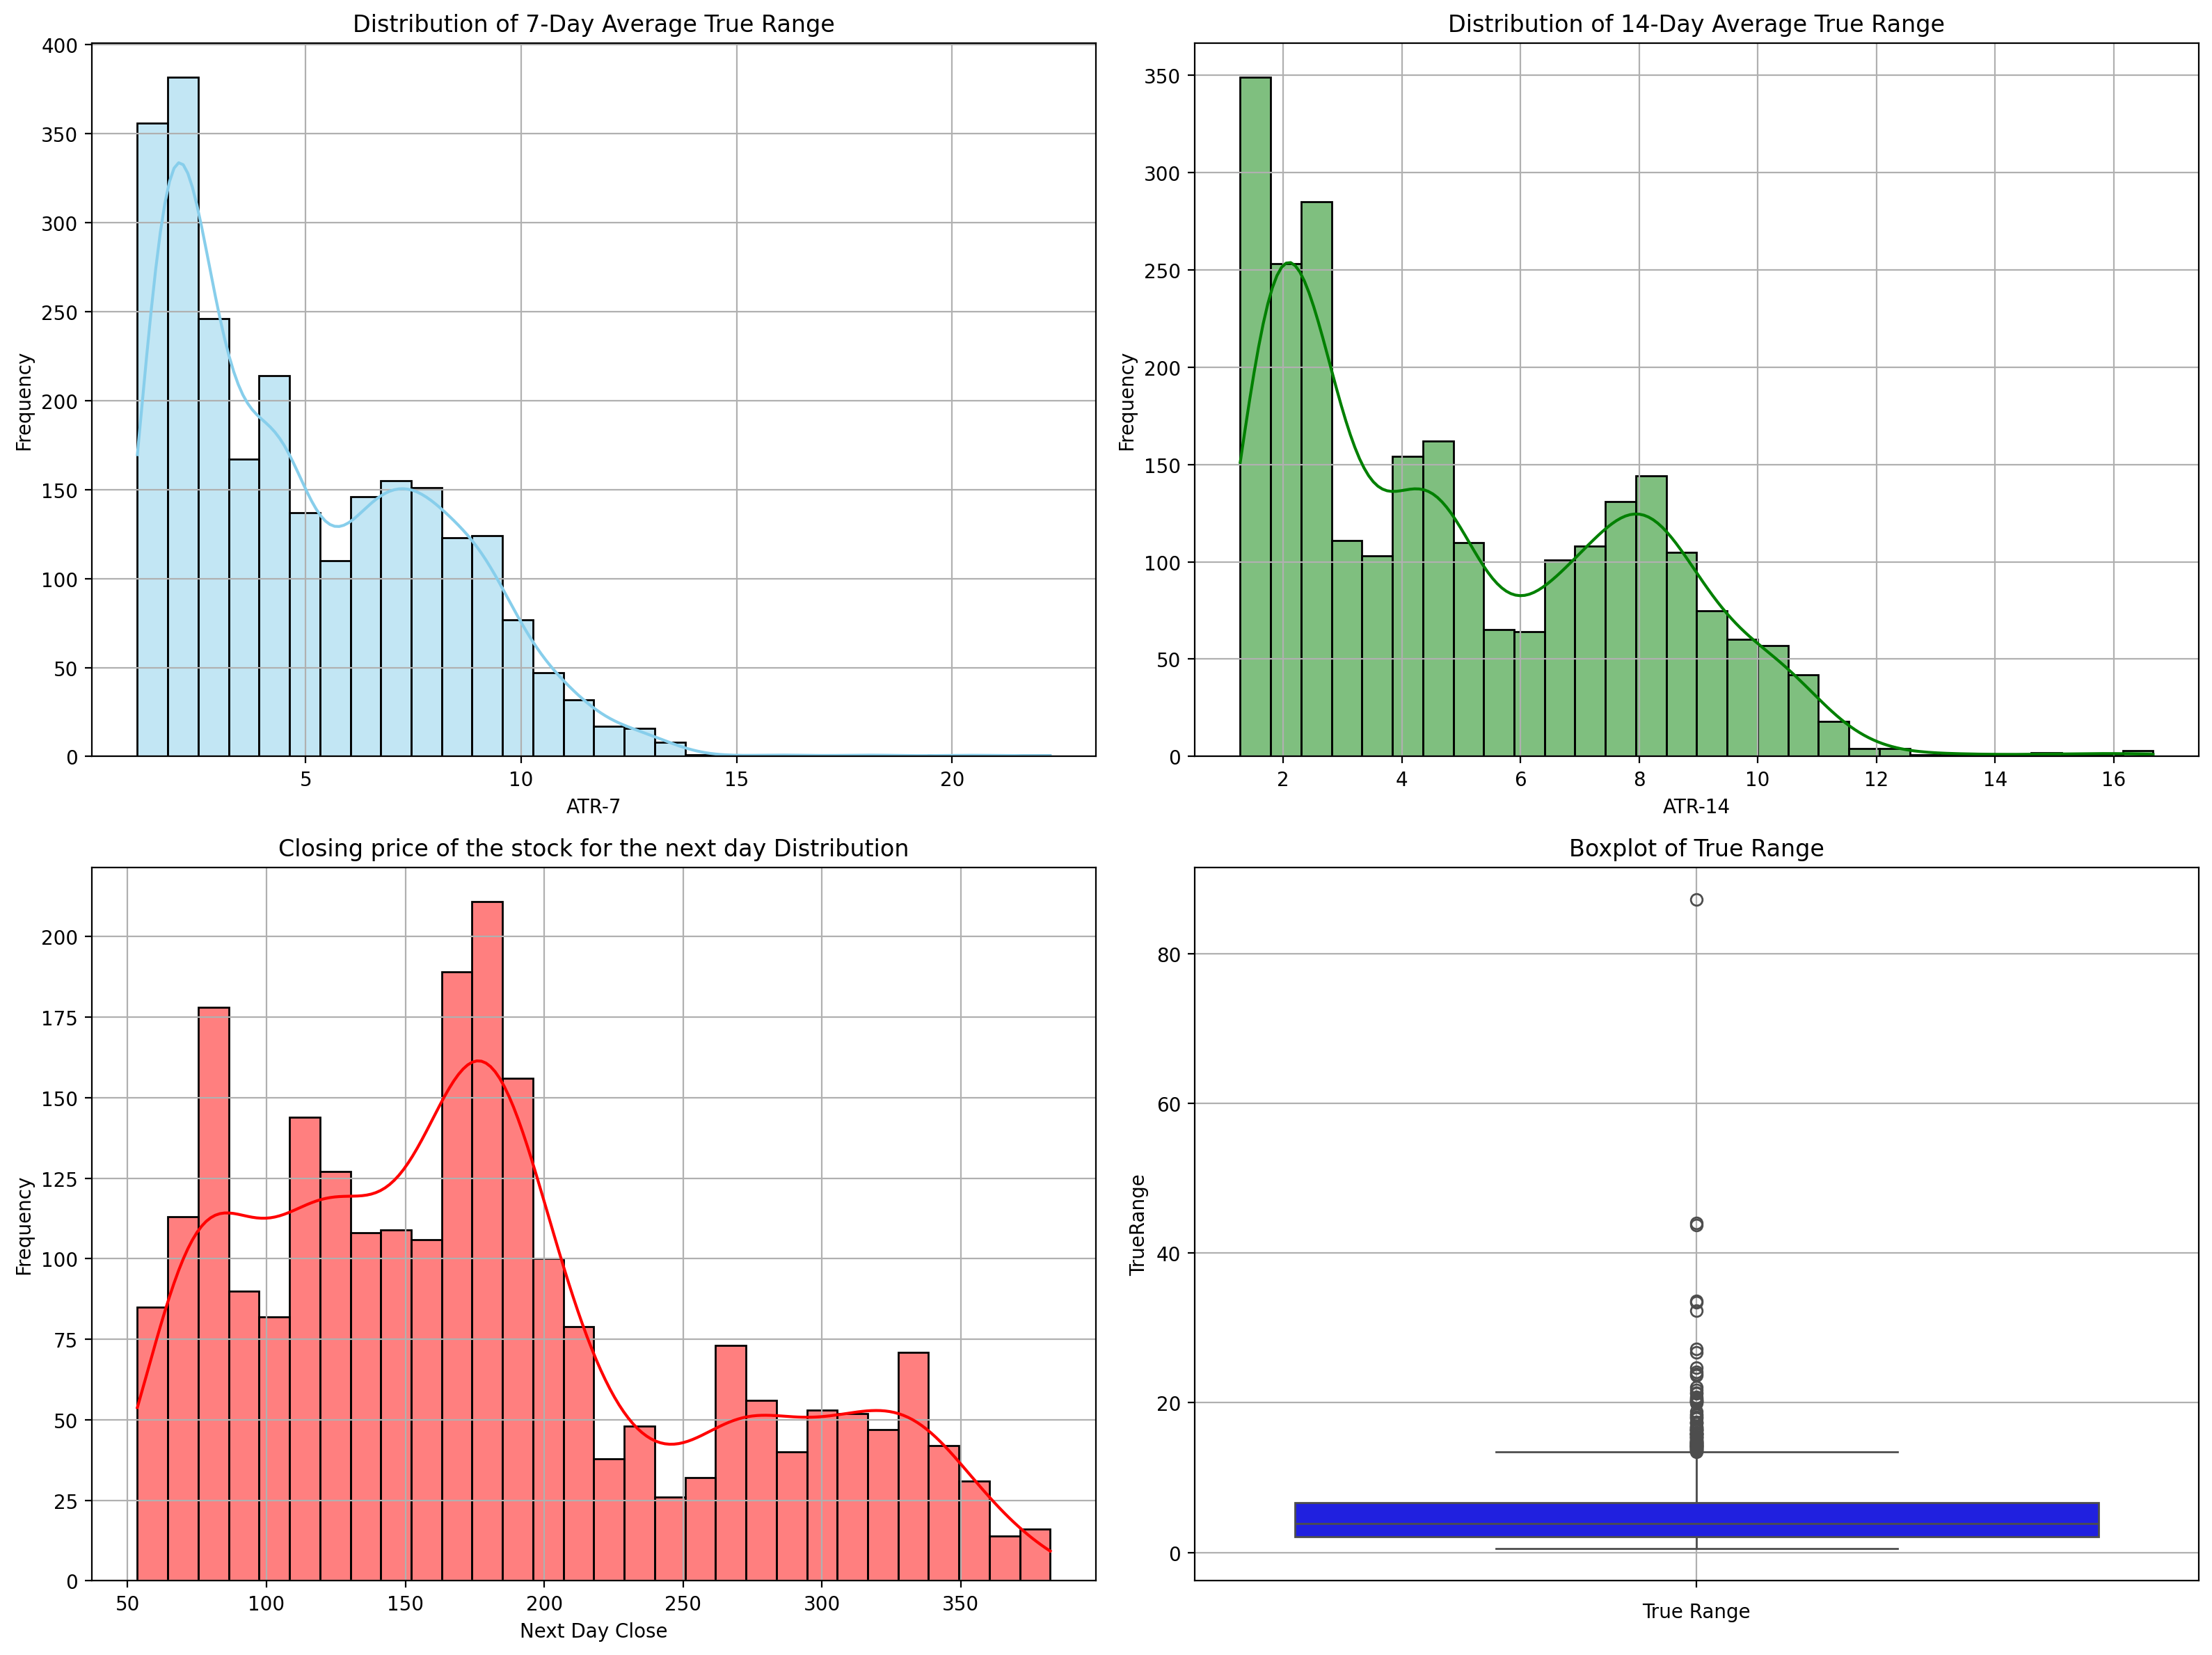

In [15]:
fig, ax = plt.subplots(2, 2, figsize = (16, 12), dpi = 200)
# Histogram of Volume of shares traded
sns.histplot(df['atr_7'], bins=30, kde=True, color='skyblue', edgecolor='black', ax = ax[0, 0])
ax[0, 0].set_title('Distribution of 7-Day Average True Range')
ax[0, 0].set_xlabel("ATR-7")
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].grid(True)

# Histogram of Moving Average Convergence Divergence
sns.histplot(df['atr_14'], bins=30, kde=True, color='green', edgecolor='black', ax = ax[0, 1])
ax[0, 1].set_title('Distribution of 14-Day Average True Range')
ax[0, 1].set_xlabel("ATR-14")
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].grid(True)

# Histogram of Closing price of the stock for the next day
sns.histplot(df['next_day_close'], bins=30, kde=True, color='red', edgecolor='black', ax = ax[1, 0])
ax[1, 0].set_title('Closing price of the stock for the next day Distribution')
ax[1, 0].set_xlabel("Next Day Close")
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].grid(True)

# Boxplot of True Range
sns.boxplot(df['TrueRange'], color= 'blue', ax = ax[1, 1])
ax[1, 1].set_title('Boxplot of True Range')
ax[1, 1].set_xlabel("True Range")
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()

### Relationship between different technical indicators and stock prices using scatter plots or heatmaps

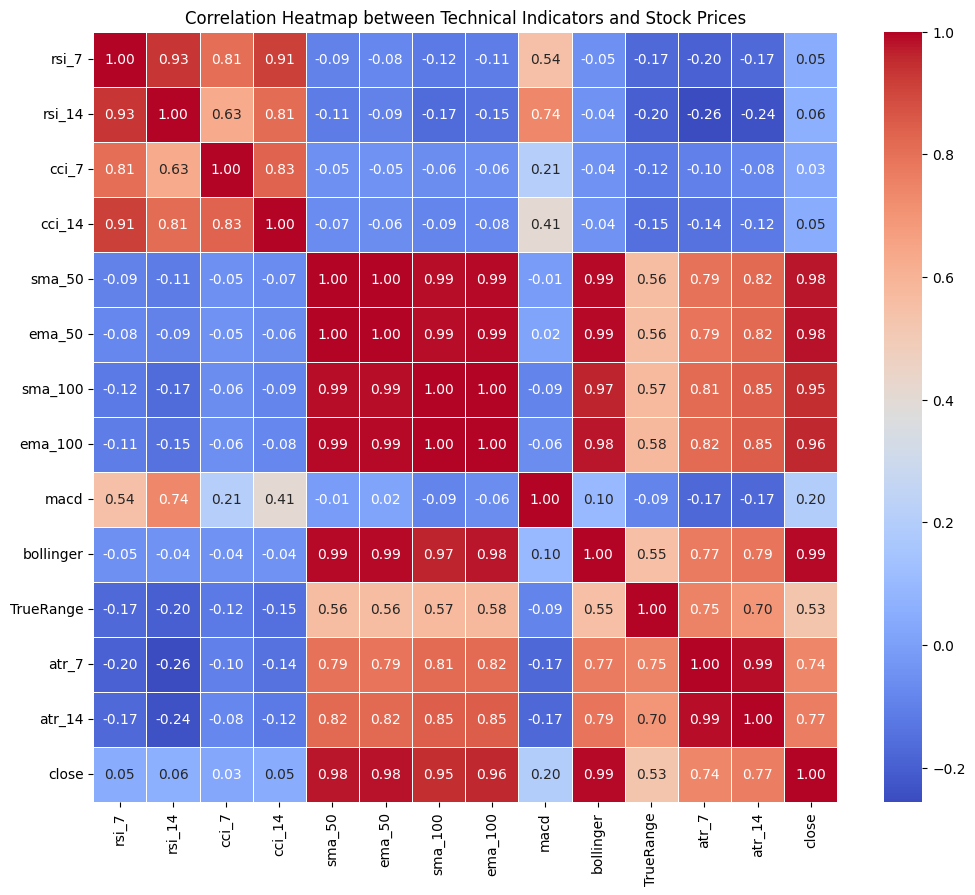

In [16]:
# Selecting columns for visualization
technical_columns = ['rsi_7', 'rsi_14', 'cci_7', 'cci_14', 'sma_50', 'ema_50',
                     'sma_100', 'ema_100', 'macd', 'bollinger', 'TrueRange', 'atr_7', 'atr_14']
target_column = 'close'  # Adjust this to the target variable of interest

# Compute the correlation matrix
corr_matrix = df[technical_columns + [target_column]].corr()

# Plotting heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Technical Indicators and Stock Prices')
plt.show()

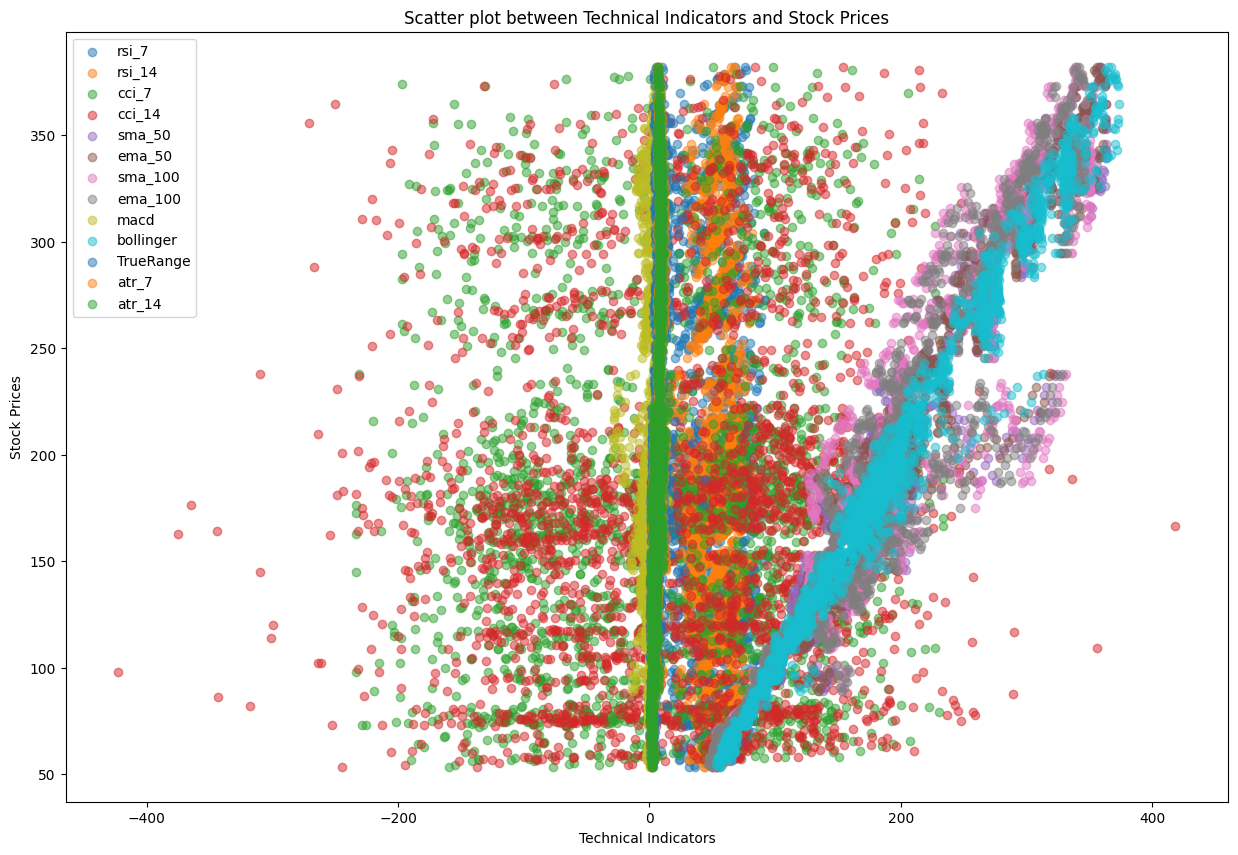

In [17]:
# Visualize relationship using scatter plots
plt.figure(figsize=(15, 10))
for col in technical_columns:
    plt.scatter(df[col], df[target_column], alpha=0.5, label=col)
plt.title('Scatter plot between Technical Indicators and Stock Prices')
plt.xlabel('Technical Indicators')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

### Plot moving averages, MACD, and other technical indicators to identify patterns.

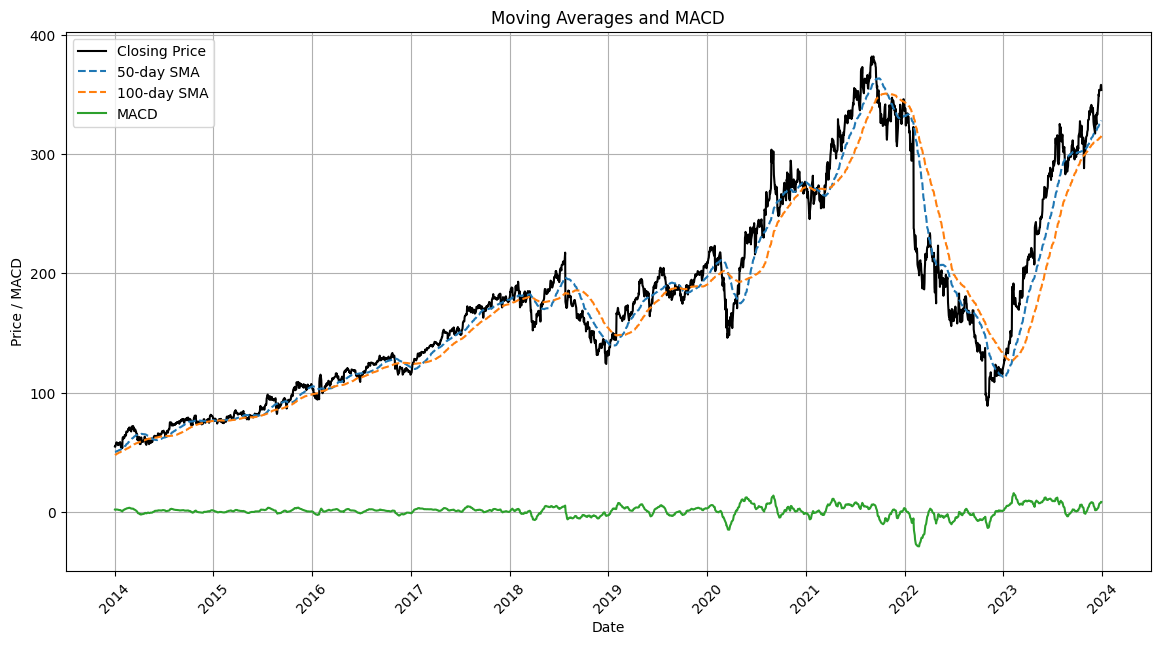

In [18]:
# Plotting moving averages
plt.figure(figsize=(14, 7))

# Plotting closing price
plt.plot(df['date'], df['close'], label='Closing Price', color='black')

# Plotting moving averages
plt.plot(df['date'], df['sma_50'], label='50-day SMA', linestyle='--')
plt.plot(df['date'], df['sma_100'], label='100-day SMA', linestyle='--')

# Plotting MACD
plt.plot(df['date'], df['macd'], label='MACD')

plt.title('Moving Averages and MACD')
plt.xlabel('Date')
plt.ylabel('Price / MACD')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [19]:
import plotly.graph_objs as go

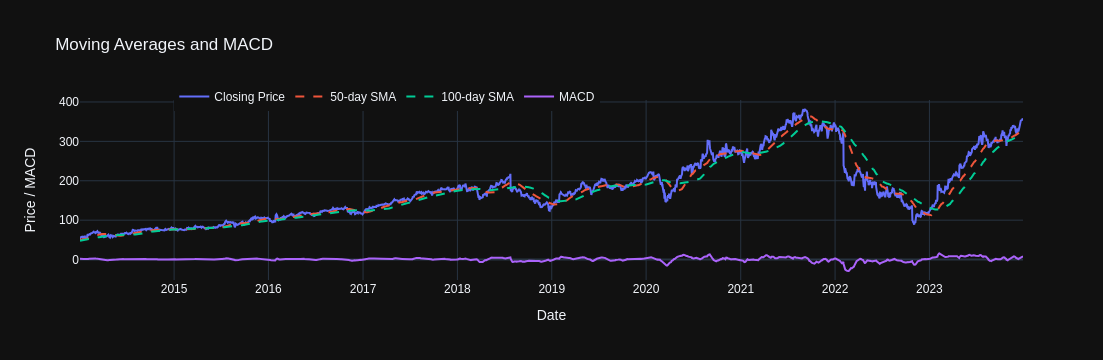

In [20]:
# Create traces for each indicator
trace_close = go.Scatter(x=df['date'], y=df['close'], mode='lines', name='Closing Price')
trace_sma_50 = go.Scatter(x=df['date'], y=df['sma_50'], mode='lines', name='50-day SMA', line=dict(dash='dash'))
trace_sma_100 = go.Scatter(x=df['date'], y=df['sma_100'], mode='lines', name='100-day SMA', line=dict(dash='dash'))
trace_macd = go.Scatter(x=df['date'], y=df['macd'], mode='lines', name='MACD')

# Create layout
layout = go.Layout(title='Moving Averages and MACD',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Price / MACD'), 
                   template = 'plotly_dark', 
                   legend=dict(orientation='h', x=0.1, y=1.1))

# Create figure
fig = go.Figure(data=[trace_close, trace_sma_50, trace_sma_100, trace_macd], layout=layout)

# Show plot
fig.show()

## Feature Engineering

### Create additional features if needed, such as:
#### Lagged versions of the target variable (next_day_close) to capture temporal dependencies.
#### Rolling window statistics for features like moving averages and exponential moving averages.
#### Relative strength index (RSI) divergence.
#### Normalize or scale the features if necessary

In [21]:
# Define the number of lagged days
num_lags = 5 

# Create lagged versions of the target variable
for i in range(1, num_lags + 1):
    df[f'next_day_close_lag_{i}'] = df['next_day_close'].shift(-i)

# Rolling window statistics for moving averages and exponential moving averages
rolling_window_sizes = [7, 14, 50, 100] 

for window_size in rolling_window_sizes:
    df[f'sma_{window_size}'] = df['close'].rolling(window=window_size).mean()
    df[f'ema_{window_size}'] = df['close'].ewm(span=window_size).mean()

# Relative Strength Index (RSI) divergence
def calculate_rsi_divergence(row):
    if row['rsi_7'] > row['rsi_14']:
        return 1
    else:
        return 0

df['rsi_divergence'] = df.apply(calculate_rsi_divergence, axis=1)

# Normalize or scale the features if necessary (you can use sklearn's StandardScaler or MinMaxScaler)

# Drop rows with NaN values due to feature engineering
df.dropna(inplace=True)

# Print the modified dataset
df.head(-5)

date        open        high         low       close    volume  \
99   2014-05-27   61.619999   63.509998   61.570000   63.480000  55682000   
100  2014-05-28   63.389999   64.139999   62.619999   63.509998  47795000   
101  2014-05-29   63.840000   64.300003   63.509998   63.830002  42700000   
102  2014-05-30   63.950001   64.169998   62.560001   63.299999  45253500   
103  2014-06-02   63.230000   63.590000   62.049999   63.080002  35996000   
...         ...         ...         ...         ...         ...       ...   
2501 2023-12-08  323.089996  333.170013  323.000000  332.750000  14077500   
2502 2023-12-11  329.399994  329.890015  320.000000  325.279999  25802500   
2503 2023-12-12  324.600006  334.470001  324.559998  334.220001  18485500   
2504 2023-12-13  333.929993  338.369995  332.640015  334.739990  16353300   
2505 2023-12-14  333.850006  334.700012  328.640015  333.170013  19607300   

          rsi_7     rsi_14       cci_7      cci_14  ...  next_day_close_lag_1  \
99    75.086705  61.167389  143.997762  196.508167  ...             63.830002   
100   75.197984  61.242470  125.658496  176.255995  ...             63.299999   
101   76.504103  62.084634   98.428859  154.559018  ...             63.080002   
102   69.438256  59.768207   56.828893  108.940441  ...             62.869999   
103   66.465489  58.787715   21.058293   78.090014  ...             63.340000   
...         ...        ...         ...         ...  ...                   ...   
2501  60.134196  56.614101  113.997627   -6.721558  ...            334.220001   
2502  46.993355  49.926485   45.064108  -41.306616  ...            334.739990   
2503  59.385500  56.542720  112.860525   21.771918  ...            333.170013   
2504  60.019757  56.899439  120.765236   72.875419  ...            334.920013   
2505  56.890307  55.420273   60.294437   48.549204  ...            344.619995   

      next_day_close_lag_2  next_day_close_lag_3  next_day_close_lag_4  \
99               63.299999             63.080002             62.869999   
100              63.080002             62.869999             63.340000   
101              62.869999             63.340000             63.189999   
102              63.340000             63.189999             62.500000   
103              63.189999             62.500000             62.880001   
...                    ...                   ...                   ...   
2501            334.739990            333.170013            334.920013   
2502            333.170013            334.920013            344.619995   
2503            334.920013            344.619995            350.359985   
2504            344.619995            350.359985            349.279999   
2505            350.359985            349.279999            354.089996   

      next_day_close_lag_5       sma_7       ema_7      sma_14      ema_14  \
99               63.340000   60.232857   60.830070   59.273572   60.069272   
100              63.189999   61.017143   61.500052   59.710714   60.528036   
101              62.500000   61.677143   62.082539   60.215715   60.968298   
102              62.880001   62.354286   62.386904   60.648572   61.279192   
103              65.769997   62.724286   62.560179   60.880714   61.519300   
...                    ...         ...         ...         ...         ...   
2501            344.619995  323.867144  326.570697  330.687860  327.338231   
2502            350.359985  323.600002  326.248023  329.638574  327.063800   
2503            349.279999  324.942858  328.241017  329.441430  328.017960   
2504            354.089996  327.045715  329.865761  328.959287  328.914231   
2505            353.390015  329.171430  330.691824  328.597859  329.481668   

      rsi_divergence  
99                 1  
100                1  
101                1  
102                1  
103                1  
...              ...  
2501               1  
2502               0  
2503               1  
2504               1  
2505               1  

[2407 rows

## Model Building

### Split the dataset into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split

# Split features and target variable
X = df.drop(['date', 'next_day_close'], axis=1)
y = df['next_day_close']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1929, 28) (1929,)
Testing set shape: (483, 28) (483,)


### Train linear regression model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)

Linear Regression MSE: 10.894188377623989


### Train random forest regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)

Random Forest Regression MSE: 14.928839633303387


### Train gradient boosting regressor

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the gradient boosting regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting Regression MSE:", mse_gb)

Gradient Boosting Regression MSE: 14.409310078520361


### Long Short-Term Memory (LSTM) networks for time series forecasting

In [26]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

2024-03-16 12:48:36.870623: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 12:48:36.870716: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 12:48:37.317028: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-16 12:48:38.306674: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-16 12:49:03.168122: W tensorflow/compiler/tf2

In [27]:
# Sort the dataframe by date
df.sort_values(by='date', inplace=True)

# Drop unnecessary columns
df.drop(['date'], axis=1, inplace=True)

# Normalize the dataset
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Define the number of time steps for LSTM
n_steps = 10  # Adjust this as needed

# Convert the dataset into sequences suitable for LSTM
X, y = [], []
for i in range(len(df_scaled) - n_steps):
    X.append(df_scaled[i:i+n_steps])
    y.append(df_scaled[i+n_steps, 0])  # Assuming 'next_day_close' is the first column

X, y = np.array(X), np.array(y)

# Split the dataset into training and testing sets (80% train, 20% test)
split_index = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

2024-03-16 12:49:15.456908: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0361 - val_loss: 0.0236
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0026 - val_loss: 0.0037
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0017 - val_loss: 0.0041
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0013 - val_loss: 0.0062
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0

## Model Evaluation

### Random Forest Regressor Evaluation

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# X_train and X_test are in  3-dimensional arrays
# Reshape the input data to 2-dimensional arrays
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Now RandomForestRegressor expects a 2-dimensional array as input
# Initialize and train the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_reshaped, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test_reshaped)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Regressor:")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)

Random Forest Regressor:
Mean Absolute Error (MAE): 0.008330421215471107
Mean Squared Error (MSE): 0.00025003309893792603
Root Mean Squared Error (RMSE): 0.01581243494651997


### Linear Regression Evaluation

In [29]:
# Reshape the input data to 2-dimensional arrays
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], -1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], -1))

# Now LinearRegression expects a 2-dimensional array as input
# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_reshaped, y_train)

# Predict on the testing set
y_pred_lr = lr_model.predict(X_test_reshaped)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("Linear Regression:")
print("Mean Absolute Error (MAE):", mae_lr)
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)

Linear Regression:
Mean Absolute Error (MAE): 0.007334812382560645
Mean Squared Error (MSE): 0.0001410152503782012
Root Mean Squared Error (RMSE): 0.011874984226440101


### Gradient Boosting Regressor Evaluation

In [30]:
# Reshape the input data to 2-dimensional arrays
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], -1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], -1))

# Now GradientBoostingRegressor expects a 2-dimensional array as input
# Initialize and train the gradient boosting regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_reshaped, y_train)

# Predict on the testing set
y_pred_gb = gb_model.predict(X_test_reshaped)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print("Gradient Boosting Regressor:")
print("Mean Absolute Error (MAE):", mae_gb)
print("Mean Squared Error (MSE):", mse_gb)
print("Root Mean Squared Error (RMSE):", rmse_gb)

Gradient Boosting Regressor:
Mean Absolute Error (MAE): 0.009568181858384248
Mean Squared Error (MSE): 0.00025594456029670956
Root Mean Squared Error (RMSE): 0.01599826741546439


## END!!!!